In [3]:
# 라이브러리 import

import numpy as np                
import matplotlib.pyplot as plt  
import pandas as pd               
import mglearn 

In [8]:
#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문


In [35]:
#KNN 최근접 알고리즘 import
from sklearn.neighbors import KNeighborsRegressor

#train_test_split 함수 import
from sklearn.model_selection import train_test_split

#X,y에 40개 샘플 datasets을 생성한다.
X, y = mglearn.datasets.make_wave(n_samples=40)

#train_test_split 함수로 훈련, 테스트 셋을 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.4)

#최근접 알고리즘을 이웃 =3 으로 설정하여 모델 객체를 생성한다.
reg = KNeighborsRegressor(n_neighbors=3)

#훈련 셋을 이용해 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
#테스트 셋의 데이터값을 예측한다.
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]


In [37]:
#결정계수(R^2) 
#모든 예측값을 평균이라고 계산한 모델 VS 내가 생성한 모델 비교 
#그래서 R^2 = 0이라면 위의 두 모델이 거의 같은 모델이므로 안좋은 모델 (내 모델이 평균 값만 계산한것과 같으니)
#R^2 = 1 이라면 예측이 거의 완벽하게 됐다는 뜻. training error = 0 (과적합)
#평균보다 더 안좋게 예측하면 음수도 나올 수 있음

#score함수를 통해 테스트 셋의 결정계수 검사한다.
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.68


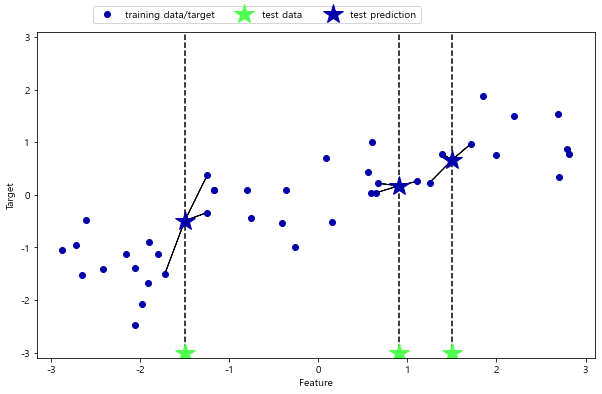

In [64]:
#이웃의 수가 3일 때 타겟값 추적
mglearn.plots.plot_knn_regression(n_neighbors=3)

X_train_shape:(24, 1) X_test.shpae:(16, 1)
X_train_shape:(24, 1) X_test.shpae:(16, 1)
X_train_shape:(24, 1) X_test.shpae:(16, 1)


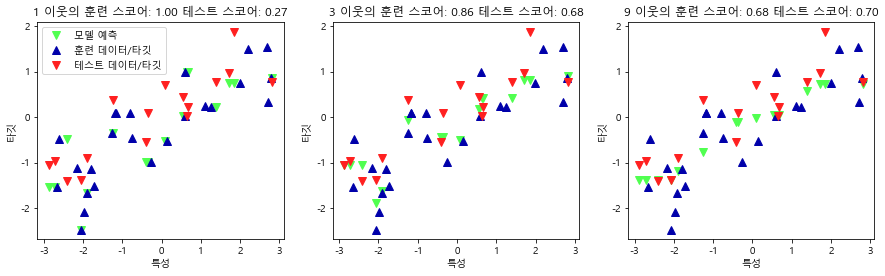

In [56]:
#반복문을 이용하여 그래프 그리기

#전체의 크기는 (15,4) 각각의 서프 그래프 크기는(1,3)
fig, axes = plt.subplots(1,3, figsize=(15,4))

#이웃의 수가 1,3,9 일 때 반복문을 이용해 그래프 작성
for n_neighbors, ax in zip([1,3,9], axes):
    
    #이웃의 수에 따라 reg 훈련 객체를 생성
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    #훈련셋과 테스트 셋의 형태(튜플,피쳐)출력
    print("X_train_shape:{}".format(X_train.shape),"X_test.shpae:{}".format(X_test.shape))
    
    #객체를 통해 훈련셋 학습
    reg.fit(X_train, y_train)

    #모델 예측 점을 (x=테스트셋 데이터값, y=테스트셋의 예측타겟값), v모양, 색깔을 2번으로, 마커사이즈=8
    ax.plot(X_test,reg.predict(X_test),'v',c=mglearn.cm3(2),markersize=8)
    
    #훈련 점 (x= 훈련셋 데이터값, y= 훈련 타겟값), ^모양, 색을 0번으로, 마커 사이즈=8
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=8)
    
    #테스트 점 (x=테스트 데이터값, y=테스트 타겟값), v모양, 색을 1번으로, 마커 사이즈=8
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    #각 그래프의 제목 
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
             n_neighbors, reg.score(X_train,y_train), reg.score(X_test, y_test)))
    
    #x축 제목
    ax.set_xlabel("특성")
   
    #y축 제목
    ax.set_ylabel("타깃")
    
#점 설명하는걸 1번 그래프에 위치
axes[0].legend(["모델 예측","훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
    
    